In [3]:
import os
import numpy as np
import pickle
import matplotlib.pyplot as plt


Bad key savefig.frameon in file /home/radhika/anaconda3/envs/conda_env_rd/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file /home/radhika/anaconda3/envs/conda_env_rd/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file /home/radhika/anaconda3/envs/conda_env_rd/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename

### Plane

In [70]:
width = 60
height = 60
plane_samples = []
for i in np.arange(0,width, 0.05):
    for j in np.arange(0,height, 0.05):
        sample = [i-width/2, j-height/2]
        plane_samples.append(sample)
plane_samples = np.array(plane_samples)
print(plane_samples.shape)

save_path = os.path.join("./data", "plane.pkl")
with open(save_path, 'wb') as f:
    pickle.dump(plane_samples, f)

(1440000, 2)


In [71]:
plane_samples[:,1].min(),plane_samples[:,1].max()

(-30.0, 29.950000000000003)

In [72]:
plane_samples[:,0].min(),plane_samples[:,0].max()

(-30.0, 29.950000000000003)

In [73]:
def concat(data):
    len_data = data.shape[0]
    means = []
    covs = []
    means.append([0])
    covs.append([[0.1]])
    sample = np.random.multivariate_normal(means[0], covs[0], len_data*8)
    sample = sample.reshape(len_data, -1)
    return np.concatenate([data, sample], -1)


plane_samples = concat(plane_samples)


save_path = os.path.join("./data", "plane_10dim.pkl")
with open(save_path, 'wb') as f:
    pickle.dump(plane_samples, f)

In [114]:
dir_path = os.path.join('./data')
os.makedirs(dir_path, exist_ok=True)
save_path = os.path.join(dir_path, "iddata_2d.pkl")
with open(save_path, 'wb') as f:
    pickle.dump(data_dict, f)

In [115]:

def concat(data):
    len_data = data.shape[0]
    means = []
    covs = []
    means.append([0])
    covs.append([[0.1]])
    sample = np.random.multivariate_normal(means[0], covs[0], len_data*8)
    sample = sample.reshape(len_data, -1)
    return np.concatenate([data, sample], -1)


data_dict['X']['train'] = concat(data_dict['X']['train'])
data_dict['X']['val'] = concat(data_dict['X']['val'])
data_dict['X']['test'] = concat(data_dict['X']['test'])


dir_path = os.path.join('./data')
os.makedirs(dir_path, exist_ok=True)
save_path = os.path.join(dir_path, "iddata_2d_dim10.pkl")
with open(save_path, 'wb') as f:
    pickle.dump(data_dict, f)

## 2D Synthetic data for binary class classification

[[5.0, 8.0], [14.0, 8.0]] [[[1.0, -0.8], [-0.8, 1.0]], [[1.0, 0.8], [0.8, 1.0]]]


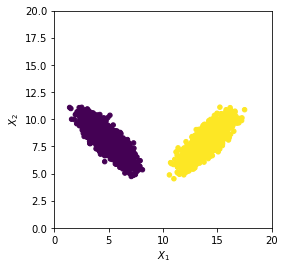

In [91]:
cls_num = 2
means = []
covs = []

means.append([5., 8.])
covs.append([[1.0, -0.8], [-0.8, 1.0]])

means.append([14., 8.])
covs.append([[1.0, 0.8], [0.8, 1.0]])


print(means, covs)
samples_train = []
samples_val = []
samples_test = []
labels_train = []
labels_val = []
labels_test = []
for i in range(cls_num):
    sample = np.random.multivariate_normal(means[i], covs[i], 3000+500+500)
    samples_train.append(sample[:3000])
    samples_val.append(sample[3000:3500])
    samples_test.append(sample[3500:4000])
    
    labels_train.append(np.zeros(sample[:3000].shape[0])+i)
    labels_val.append(np.zeros(sample[3000:3500].shape[0])+i)
    labels_test.append(np.zeros(sample[3500:].shape[0])+i)
    
data_dict = dict()
data_dict['X'] = dict()
data_dict['y'] = dict()

data_dict['X']['train'] = np.concatenate(samples_train, axis = 0)
data_dict['y']['train'] = np.concatenate(labels_train, axis = 0)

data_dict['X']['val'] = np.concatenate(samples_val, axis = 0)
data_dict['y']['val'] = np.concatenate(labels_val, axis = 0)

data_dict['X']['test'] = np.concatenate(samples_test, axis = 0)
data_dict['y']['test'] = np.concatenate(labels_test, axis = 0)

plt.scatter(data_dict['X']['train'][:, 0], data_dict['X']['train'][:, 1], c=data_dict['y']['train'], s=20)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.xlim(0, 20)
plt.ylim(0, 20)
plt.gca().set_aspect('equal')
plt.show()

In [92]:
dir_path = os.path.join('./data')
os.makedirs(dir_path, exist_ok=True)
save_path = os.path.join(dir_path, "iddata_2d_ellipse_binary.pkl")
with open(save_path, 'wb') as f:
    pickle.dump(data_dict, f)

In [93]:
def concat(data):
    len_data = data.shape[0]
    means = []
    covs = []
    means.append([0])
    covs.append([[0.1]])
    sample = np.random.multivariate_normal(means[0], covs[0], len_data*8)
    sample = sample.reshape(len_data, -1)
    return np.concatenate([data, sample], -1)

In [94]:
data_dict['X']['train'] = concat(data_dict['X']['train'])
data_dict['X']['val'] = concat(data_dict['X']['val'])
data_dict['X']['test'] = concat(data_dict['X']['test'])

dir_path = os.path.join('./data')
os.makedirs(dir_path, exist_ok=True)
save_path = os.path.join(dir_path, "iddata_2d_ellipse_binary_dim10.pkl")
with open(save_path, 'wb') as f:
    pickle.dump(data_dict, f)